In [2]:
import pandas as pd
import numpy as np
import s3fs 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import model_selection
from sklearn import ensemble
from sklearn import pipeline

# File path in S3
file_path = 's3://prlearningbucket/CreditCard-FraudDetection/creditcard.csv'

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)

# Inspect the data
print(df.head())


PermissionError: Forbidden

In [3]:
print(df.shape[0], "records")
print(df.shape[1]-1, "features")

284807 records
30 features


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df_0 = df[df.Class == 0]
df_1 = df[df.Class == 1]

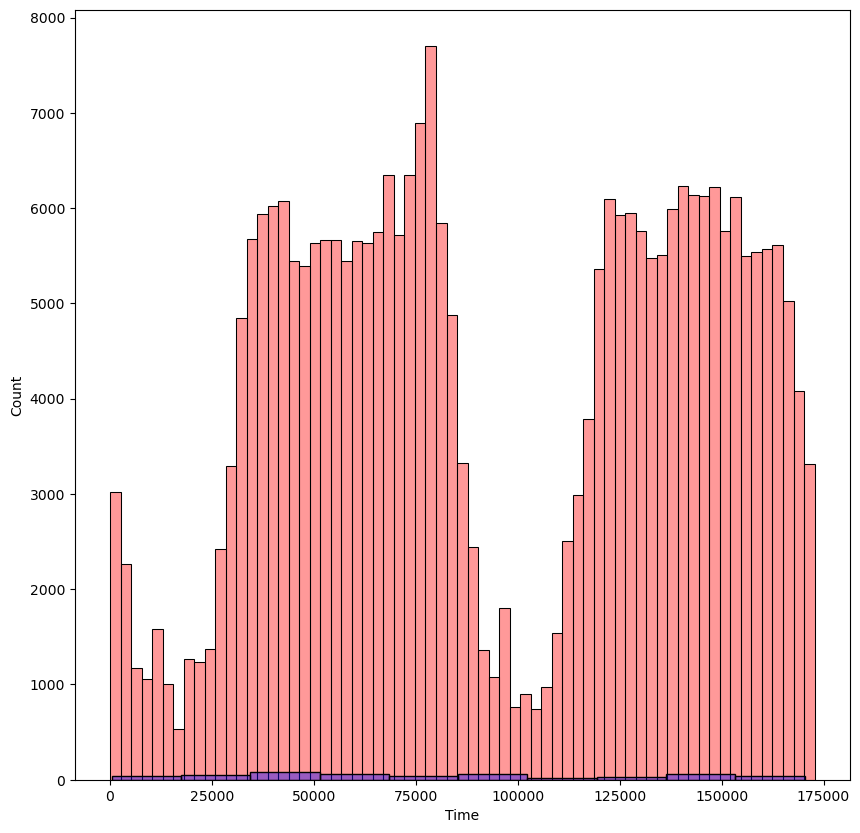

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
for a, c in zip([df_0, df_1], ['r', 'b']):
    sns.histplot(data=a, x='Time', ax=ax, color=c, alpha=0.4)

In [8]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
df.Amount.quantile(q=0.99)

1017.9700000000012

In [10]:
df[df.Amount>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [11]:
X = df.drop('Class', axis=1)
Y = df.Class.values

In [12]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
scale_columns = ['Time', 'Amount']
preprocess = make_column_transformer((StandardScaler(), scale_columns),
                                     remainder='passthrough')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    stratify=Y)
logreg = LogisticRegression()
pipe = make_pipeline(preprocess, logreg)
score = np.mean(cross_val_score(pipe, X_train, Y_train, cv=5, 
                                scoring='roc_auc'))
print(score)

0.9750409480036764


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
pipe.fit(X_train, Y_train)
print(accuracy_score(Y_train, pipe.predict(X_train)))

0.9991309881717835


In [14]:
print(accuracy_score(Y_test, pipe.predict(X_test)))

0.9992802219023208


In [15]:
y_pred_proba = pipe.predict_proba(X_test)[:,1]
y_pred_proba[:2]

array([0.00041042, 0.00017823])

In [16]:
y_pred = []
for i in y_pred_proba:
    if i < 0.9668675096379374:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [17]:
cm = confusion_matrix(Y_test, y_pred)

Text(50.722222222222214, 0.5, 'Predicted')

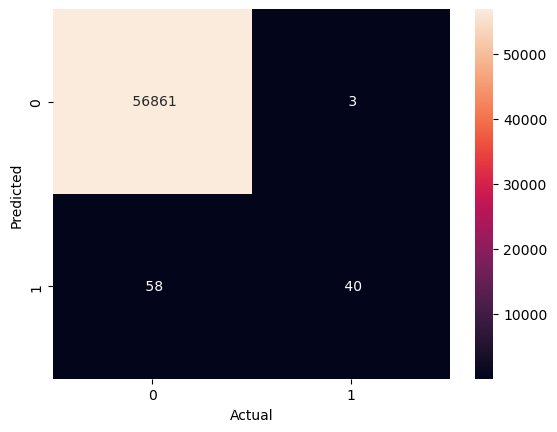

In [18]:
ax = sns.heatmap(cm, fmt=' ', annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

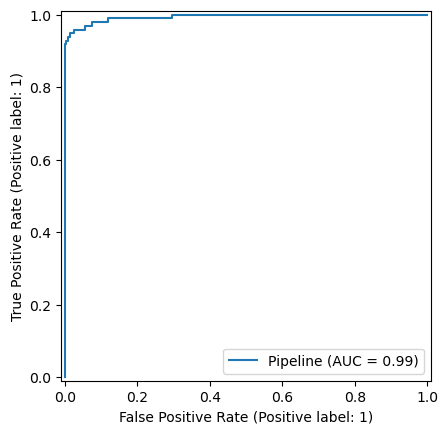

In [24]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipe, X_test, Y_test)
plt.show()